# 001 实现线性回归模型


In [1]:
# Import package
import random
import matplotlib.pyplot as plt
import torch
%matplotlib inline


## 构造一个人造的数据集

### 定义线性模型参数

- Weight: $w=[2, -3.4]^T$
- Bias: $b=4.2$
- 噪声: $\epsilon$
- 标签: $y = Xw + b + \epsilon$

In [2]:
def create_data(w, b, size):
    # X: 均值为0, 方差为1, 大小为size*len(w)
    X = torch.normal(0, 1, (size, len(w)))
    y = torch.matmul(X, w) + b
    # 创造噪音epsilon
    epsilon = torch.normal(0, 0.01, y.shape)
    y += epsilon
    # reshape(x, y): 将张量变形，值为-1时表示自动.
    return X, y.reshape((-1, 1))


real_w, real_b = torch.tensor([2, -3.4]), 4.2
features, labels = create_data(w=real_w, b=real_b, size=1000)

features[0], labels[0]


(tensor([ 0.7875, -1.1953]), tensor([9.8377]))

### 将数据集打印出来

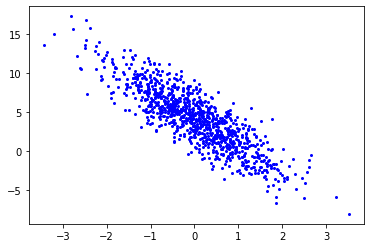

In [3]:
plt.plot(features[:, 1].detach().numpy(),
         labels.detach().numpy(), 'bo', markersize=2)
plt.show()


## 生成固定大小的 Batch

In [4]:
def data_iter(features, labels, batch_size):
    feat_size = len(features)
    # 生成一个大小为feat_size的下标列表并打乱
    indices = list(range(feat_size))
    random.shuffle(indices)

    for i in range(0, feat_size, batch_size):
        # end有可能超过features的总数, 因此取min
        idx = indices[i:min(i+batch_size, feat_size)]
        batch_indices = torch.tensor(idx)
        yield features[batch_indices], labels[batch_indices]


for X, y in data_iter(features, labels, batch_size=10):
    print(X, '\n', y)
    break


tensor([[ 1.1208,  0.5226],
        [ 0.7048, -0.3419],
        [ 0.3154, -0.9024],
        [ 1.0894,  0.5151],
        [ 2.5381, -0.3082],
        [ 0.4752, -2.5009],
        [-0.7048,  0.8653],
        [-0.5698,  1.4895],
        [ 0.6120, -0.5801],
        [ 0.1840, -1.2420]]) 
 tensor([[ 4.6572],
        [ 6.7597],
        [ 7.9063],
        [ 4.6438],
        [10.3106],
        [13.6609],
        [-0.1644],
        [-2.0161],
        [ 7.4049],
        [ 8.7906]])


## 定义初始化模型参数

In [5]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b


(tensor([[-0.0082],
         [-0.0227]], requires_grad=True),
 tensor([0.], requires_grad=True))

## 定义模型

In [6]:
def linreg(X, w, b):
    # y = Xw + b
    return torch.matmul(X, w) + b


## 定义损失函数

使用均方误差:
$$
L = \frac{1}{2}(\hat{y} - y)^2
$$

In [7]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2


## 定义优化算法

In [8]:
def sgd(params, learning_rate, batch_size):
    with torch.no_grad():
        for param in params:
            param -= learning_rate * param.grad / batch_size
            param.grad.zero_()


## 开始训练

定义参数

In [9]:
learning_rate = 0.03
epoch_times = 10
net = linreg
loss = squared_loss


In [10]:
for epoch in range(epoch_times):
    for X, y in data_iter(features, labels, batch_size=10):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd(params=[w, b], learning_rate=learning_rate, batch_size=10)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch: {epoch+1}, loss: {float(train_l.mean()):f}')


epoch: 1, loss: 0.044077
epoch: 2, loss: 0.000183
epoch: 3, loss: 0.000052
epoch: 4, loss: 0.000051
epoch: 5, loss: 0.000051
epoch: 6, loss: 0.000051
epoch: 7, loss: 0.000051
epoch: 8, loss: 0.000051
epoch: 9, loss: 0.000051
epoch: 10, loss: 0.000051


## 比较训练w, b与真实real_w, real_b

In [11]:
diff_w = real_w - w.reshape(real_w.shape)
diff_b = real_b - b

print(f'diff_w: {diff_w}, diff_b: {diff_b}')


diff_w: tensor([3.3021e-05, 2.7823e-04], grad_fn=<SubBackward0>), diff_b: tensor([6.5804e-05], grad_fn=<RsubBackward1>)
